In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
x=boston.data
y=boston.target

In [11]:
lg=LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)


In [13]:
lg.fit(x_train , y_train)

LinearRegression()

In [14]:
print ( "x train shape",x_train.shape)
print ( "y train shape",y_train.shape)
print ( "x test shape",x_test.shape)
print ( "y test shape",y_test.shape)

x train shape (394, 13)
y train shape (394,)
x test shape (112, 13)
y test shape (112,)


In [15]:
lg.coef_

array([-7.44581424e-02,  4.62144239e-02,  1.35378193e-03,  2.89467226e+00,
       -1.65488200e+01,  3.39167263e+00,  1.43212344e-02, -1.35016527e+00,
        3.25419359e-01, -1.24356481e-02, -9.82993677e-01,  9.55166406e-03,
       -6.45067794e-01])

In [16]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

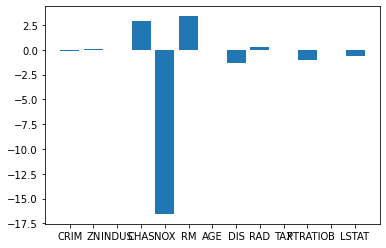

In [17]:
plt.bar(boston.feature_names,lg.coef_)
plt.show()

In [18]:
bos=pd.DataFrame(boston.data)

In [19]:
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [20]:
bos.columns=boston.feature_names

In [21]:
bos.shape

(506, 13)

In [22]:
bos["B"]

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: B, Length: 506, dtype: float64

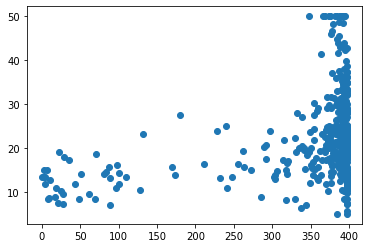

In [23]:
plt.scatter(bos['B'],y)

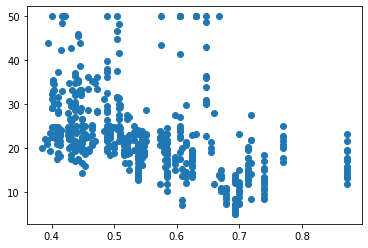

In [24]:
plt.scatter(bos['NOX'],y)

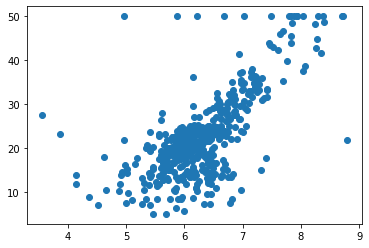

In [25]:
plt.scatter(bos['RM'],y)

Text(0, 0.5, 'house price')

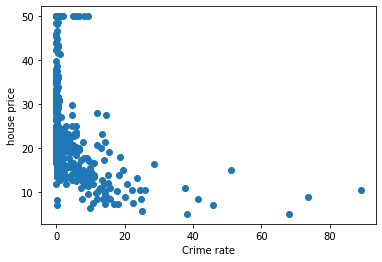

In [26]:
plt.scatter(bos['CRIM'],y)
plt.xlabel("Crime rate")
plt.ylabel("house price")

In [27]:
lg.coef_

array([-7.44581424e-02,  4.62144239e-02,  1.35378193e-03,  2.89467226e+00,
       -1.65488200e+01,  3.39167263e+00,  1.43212344e-02, -1.35016527e+00,
        3.25419359e-01, -1.24356481e-02, -9.82993677e-01,  9.55166406e-03,
       -6.45067794e-01])

In [28]:
pred=lg.predict(x_test)
print( "predicted result price",pred)
print("actual price ",y_test)

predicted result price [23.4278161  16.70782013 20.39616843 33.78342946 16.79491796 12.9279169
 13.06082815 24.62572231 22.83127046  8.09703518 28.51295925 26.5498108
 16.55852669 21.06010383 21.64680475 11.17809049 31.9426208  32.93246344
 14.67935821 40.77959285 20.97452539  8.11065917 21.12534393 31.24872873
  6.30060588 25.16830285 19.826237   19.51042475 19.43936524  7.09971493
 21.66309855 23.75175252 14.81529929  9.02287439 24.41173479 19.49683828
 16.06451668 20.72065511 28.47123435 26.81990327 20.79261318  5.39178752
 25.56943277 17.76389062 37.86786451 18.01655712 24.04550027 22.27895857
 35.17213029 17.69791706 27.84214432 37.09507699 34.43136805 22.41718877
 11.76173614 37.37880926 33.82598163 25.93946482 28.25103237 28.63843544
 22.12461722 14.12550652 25.81897595 27.49935689 26.39913991 13.58853004
 22.95509272 36.37842464  7.75978585 24.4637731  12.5099429   2.77490415
  7.13232809 -0.80660186  6.57145487 27.29986618 25.14695592 19.69599923
 21.95928027 16.39275848 12.45

In [29]:
print("error:")
print(mean_squared_error(pred,y_test))

error:
25.93994529221764


In [30]:
round(lg.score(x_train , y_train),2)

0.74

In [31]:
#pred house price 
t=np.array([0.4,18.4,2.31,0.0,0.53,0.2,6.54,65.2,4.22,1,2,15.3,935.,])

In [32]:
t.shape

(13,)

In [33]:
x.shape

(506, 13)

In [34]:
t=t.reshape(1,-1)

In [35]:
lg.predict(t)

array([-660.10352657])

# Regularization

In [36]:
from sklearn.linear_model import Lasso,Ridge

In [37]:
ls=Lasso(alpha=0.000001)
#alfa values in default is 1.0
ls.fit(x_train , y_train)
ls.score(x_train,y_train)

0.7421623911087978

In [38]:
lg.score(x_train,y_train)

0.7421623911134368

In [39]:
ls.coef_

array([-7.44578486e-02,  4.62144881e-02,  1.35239721e-03,  2.89465458e+00,
       -1.65484656e+01,  3.39167261e+00,  1.43209693e-02, -1.35015973e+00,
        3.25418810e-01, -1.24356907e-02, -9.82990380e-01,  9.55170036e-03,
       -6.45068373e-01])

In [40]:
lg.score(x_train,y_train)-ls.score(x_train,y_train)

4.639066908396217e-12

In [41]:
ls.coef_

array([-7.44578486e-02,  4.62144881e-02,  1.35239721e-03,  2.89465458e+00,
       -1.65484656e+01,  3.39167261e+00,  1.43209693e-02, -1.35015973e+00,
        3.25418810e-01, -1.24356907e-02, -9.82990380e-01,  9.55170036e-03,
       -6.45068373e-01])

<BarContainer object of 13 artists>

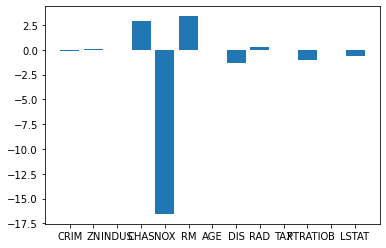

In [42]:
plt.bar(boston.feature_names,ls.coef_)

# try ridge

In [43]:
rd=Ridge(alpha=0.00001)

rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7421623911126962

In [44]:
rd.coef_

array([-7.44580265e-02,  4.62144493e-02,  1.35319762e-03,  2.89467050e+00,
       -1.65486749e+01,  3.39167347e+00,  1.43211078e-02, -1.35016315e+00,
        3.25419118e-01, -1.24356641e-02, -9.82992273e-01,  9.55167911e-03,
       -6.45067956e-01])

<function matplotlib.pyplot.show(close=None, block=None)>

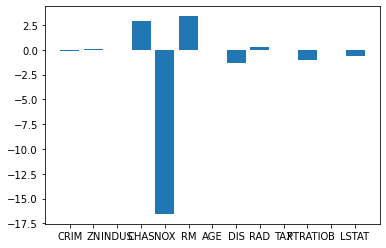

In [45]:
plt.bar(boston.feature_names,rd.coef_)
plt.show

# try ilstic ne

In [46]:
from sklearn.linear_model import ElasticNet


In [47]:
en=ElasticNet(alpha=0.00001)

#with incrased alpha vaue  the model learns less of the model

In [48]:
en.fit(x_train,y_train)

preden=en.predict(x_test)

In [49]:
en.score(x_train,y_train)

0.7421623587698805

In [50]:
en.coef_

array([-7.44338858e-02,  4.62197428e-02,  1.23196091e-03,  2.89423704e+00,
       -1.65185144e+01,  3.39183610e+00,  1.42950064e-02, -1.34972123e+00,
        3.25369253e-01, -1.24390024e-02, -9.82701143e-01,  9.55480539e-03,
       -6.45102472e-01])

<BarContainer object of 13 artists>

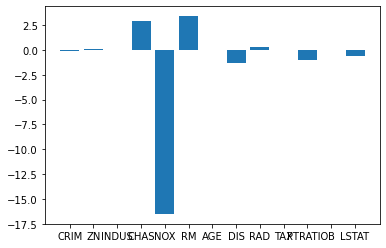

In [51]:
plt.bar(boston.feature_names,en.coef_)

In [52]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.7034415969666628
0.18575366210266653
0.19906364048784686
